In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Dataset_Sign/keypoint.zip .

In [ ]:
!unzip keypoint.zip

Archive:  keypoint.zip
  inflating: keypoint.csv            
  inflating: keypoint_classifier.hdf5  
  inflating: keypoint_classifier.tflite  


In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specifiy each path

In [ ]:
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier.hdf5'

# Set number of classes

In [ ]:
NUM_CLASSES = 43

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.90, random_state=RANDOM_SEED)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(1600, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(600, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1600, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_16 (Dense)            (None, 1600)              68800     
                                                                 
 dropout_13 (Dropout)        (None, 1600)              0         
                                                                 
 dense_17 (Dense)            (None, 600)               960600    
                                                                 
 dropout_14 (Dropout)        (None, 600)               0         
                                                                 
 dense_18 (Dense)            (None, 1600)              961600    
                                                                 
 dense_19 (Dense)            (None, 43)               

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=80,
    batch_size=496,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/80
1165/1172 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9780
Epoch 1: saving model to keypoint_classifier.hdf5
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0686 - accuracy: 0.9780 - val_loss: 0.0728 - val_accuracy: 0.9820
Epoch 2/80
1169/1172 [============================>.] - ETA: 0s - loss: 0.0662 - accuracy: 0.9785
Epoch 2: saving model to keypoint_classifier.hdf5
1172/1172 [==============================] - 5s 5ms/step - loss: 0.0662 - accuracy: 0.9785 - val_loss: 0.0716 - val_accuracy: 0.9822
Epoch 3/80
1169/1172 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9782
Epoch 3: saving model to keypoint_classifier.hdf5
1172/1172 [==============================] - 6s 5ms/step - loss: 0.0682 - accuracy: 0.9782 - val_loss: 0.0734 - val_accuracy: 0.9822
Epoch 4/80
1163/1172 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9780
Epoch 4: saving model to keypoint_classifier.hdf5
1172/1172

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

505/505 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9833


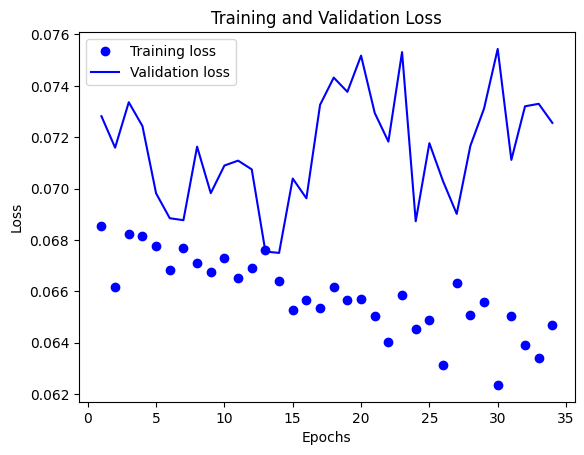

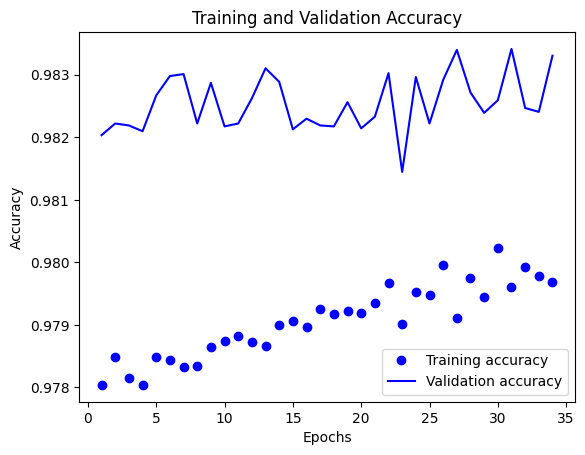

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Extracting metrics from history
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.figure()
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.show()

plot_metrics(history)

In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 59ms/step
[1.5372801e-15 2.5363771e-09 1.5686881e-16 7.3960111e-16 2.5640639e-20
 2.3676577e-19 4.8903972e-19 1.2138950e-17 2.3397007e-10 8.3899229e-17
 7.4040363e-10 1.4097997e-15 4.4862010e-11 1.3414056e-10 4.3106374e-14
 3.4436755e-14 3.3717391e-18 1.1095900e-13 3.3299432e-13 4.2600771e-21
 1.3696663e-14 2.2522041e-12 2.3289467e-15 1.5861694e-15 7.6733602e-12
 5.3206134e-10 9.9999905e-01 6.1014223e-12 8.0563029e-16 3.0385729e-23
 2.5675087e-13 3.6727329e-07 3.3154081e-15 2.0007507e-15 1.1336768e-08
 1.0548925e-12 9.1114233e-15 4.0593969e-15 1.3665537e-17 3.6499349e-11
 4.4321049e-09 6.3541790e-07 1.4044944e-10]
26


# Confusion matrix

2018/2018 [==============================] - 4s 2ms/step


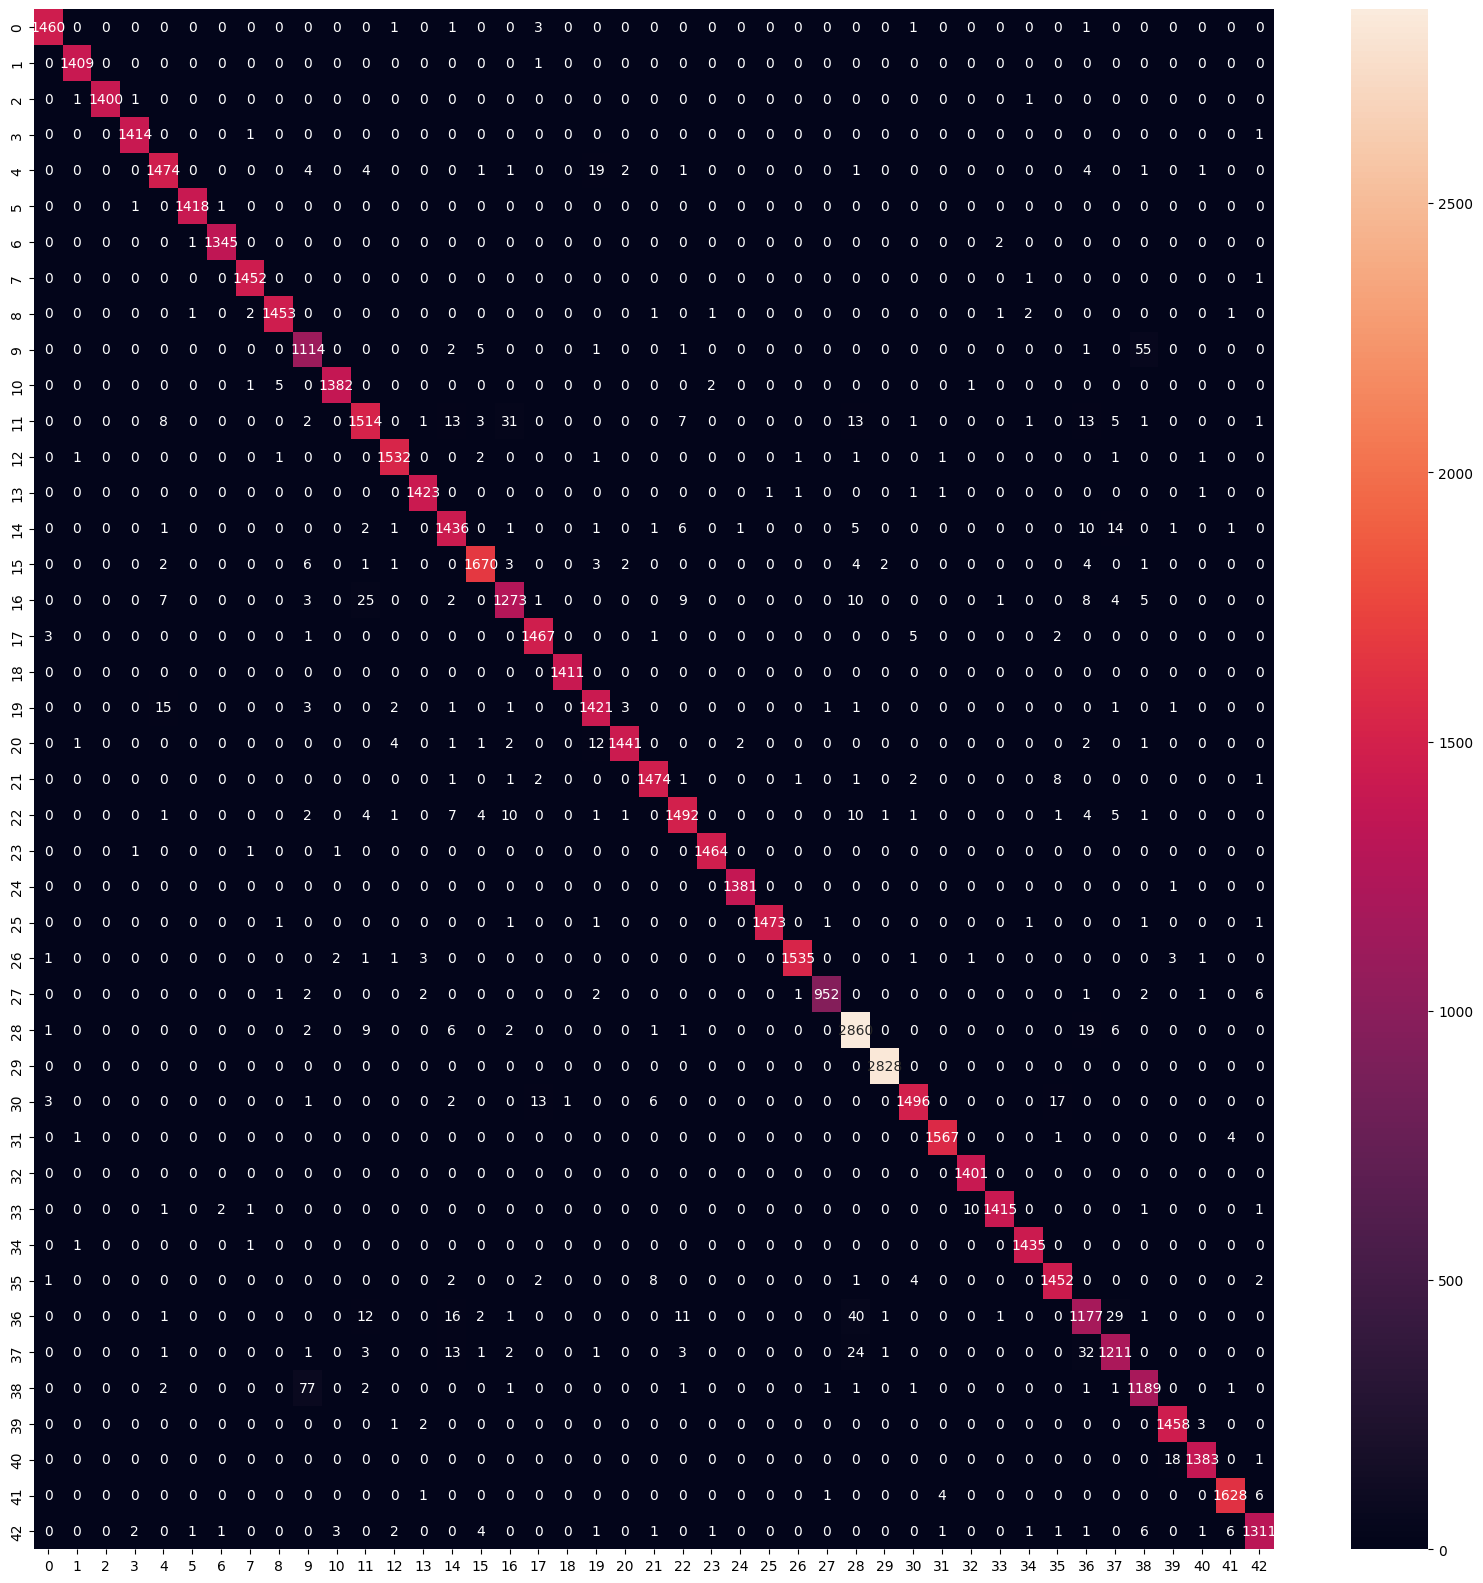

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1467
           1       1.00      1.00      1.00      1410
           2       1.00      1.00      1.00      1403
           3       1.00      1.00      1.00      1416
           4       0.97      0.97      0.97      1513
           5       1.00      1.00      1.00      1420
           6       1.00      1.00      1.00      1348
           7       1.00      1.00      1.00      1454
           8       0.99      0.99      0.99      1462
           9       0.91      0.94      0.93      1179
          10       1.00      0.99      0.99      1391
          11       0.96      0.94      0.95      1614
          12       0.99      0.99      0.99      1542
          13       0.99      1.00      1.00      1428
          14       0.96      0.97      0.96      1481
          15       0.99      0.98      0.98      1699
          16       0.96      0.94      0.95      1348
     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

## 3

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)
tflite_save_path = 'keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2074160

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 777 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.17475508e-15 1.74294923e-09 1.48440023e-16 1.02926605e-15
 1.85806237e-20 2.45189000e-19 4.34364068e-19 1.50972605e-17
 3.31923905e-10 8.64028200e-17 6.14097384e-10 1.59173987e-15
 5.89710294e-11 1.95051697e-10 4.09686018e-14 3.17962345e-14
 5.29494978e-18 4.87088905e-14 3.47825555e-13 4.87694259e-21
 1.59585056e-14 1.79177539e-12 1.82777449e-15 2.05198242e-15
 5.09292521e-12 4.48243220e-10 9.99999285e-01 6.37229635e-12
 6.78608281e-16 4.24265551e-23 2.56583464e-13 3.55195681e-07
 2.61614956e-15 1.21289686e-15 9.81014736e-09 1.04129303e-12
 8.58804249e-15 5.26271862e-15 1.03705685e-17 3.71872394e-11
 3.71003495e-09 3.77733613e-07 7.94632485e-11]
26


In [ ]:
!cp /content/keypoint_classifier.hdf5 /content/drive/MyDrive/Belan_New_Version/Model/Model_4

In [ ]:
!cp /content/keypoint_classifier.tflite /content/drive/MyDrive/Belan_New_Version/Model/Model_4